# Song Popularity Prediction

In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
# Read dataset into a DataFrame
df = pd.read_csv('..\data\song_data.csv')

print('There are {} columns & {} samples in this dataset'.format(df.shape[1], df.shape[0]))

There are 15 columns & 18835 samples in this dataset


Now we will deal with duplicates

In [2]:
counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('The dataset doesn\'t have any duplicates')
else:
    print(f'Number of duplicates dealt with: {rs-df.shape[0]}')

Number of duplicates dealt with: 3909


How many there are Null-Values?

In [3]:
df.isna().sum()

song_name           0
song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

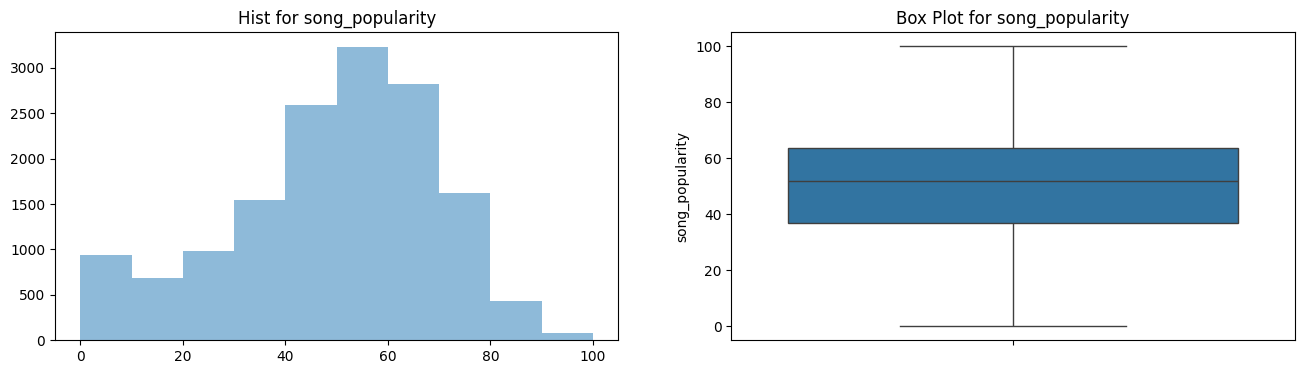

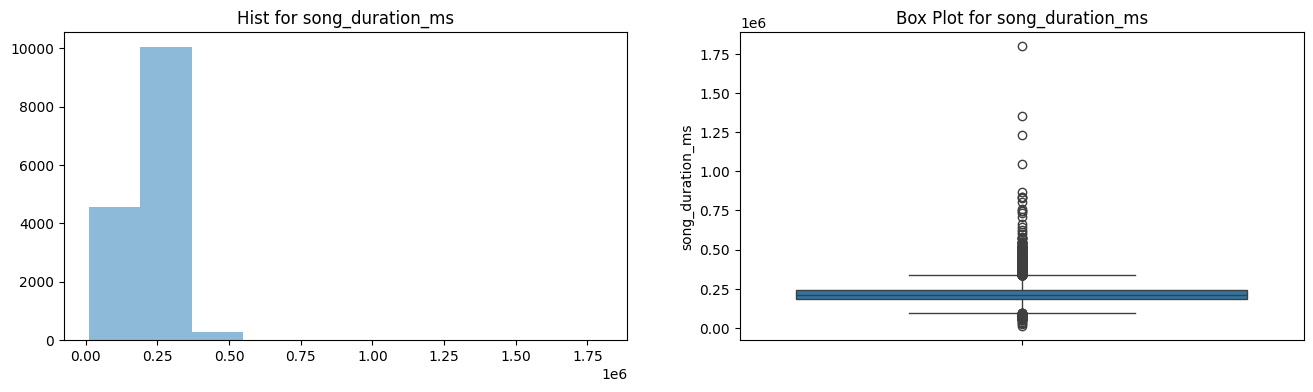

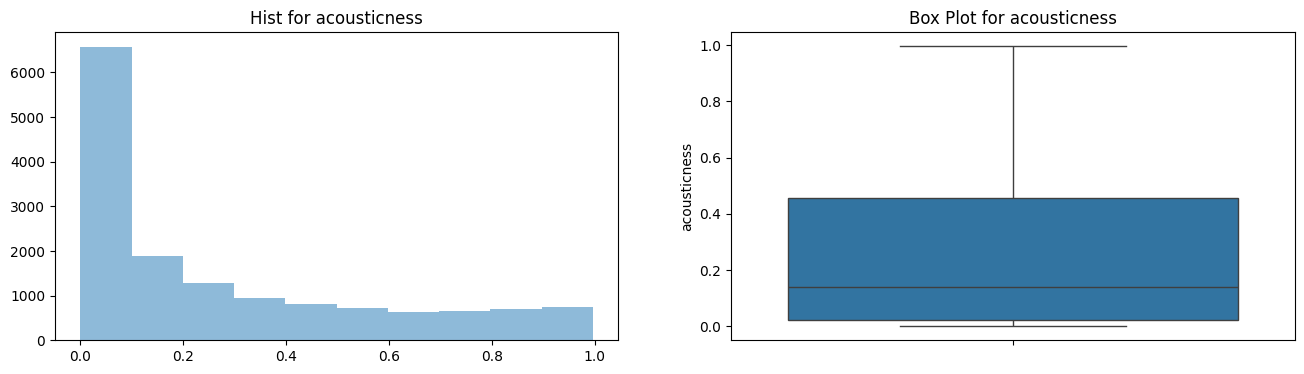

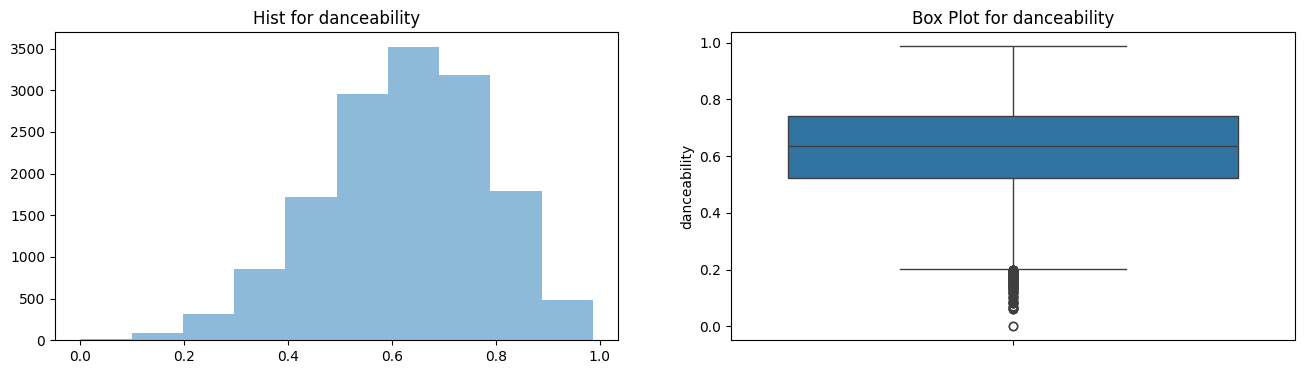

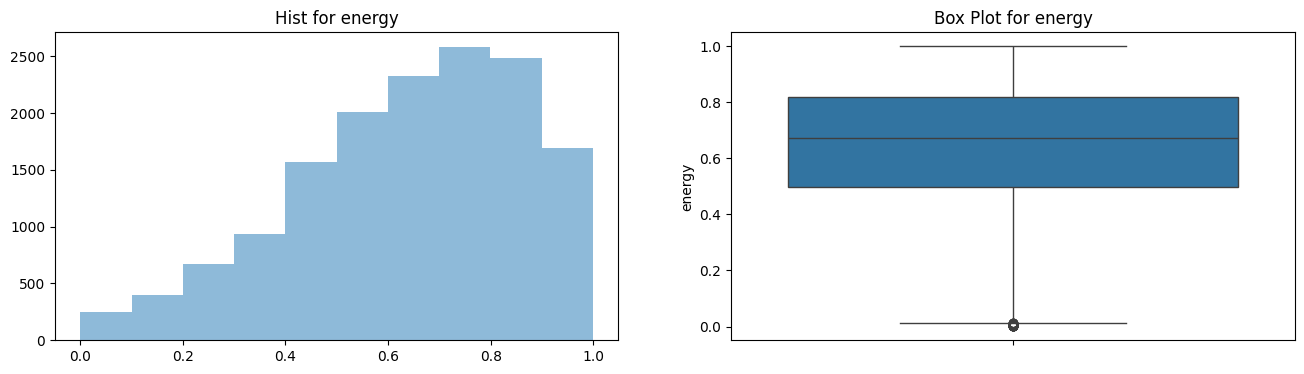

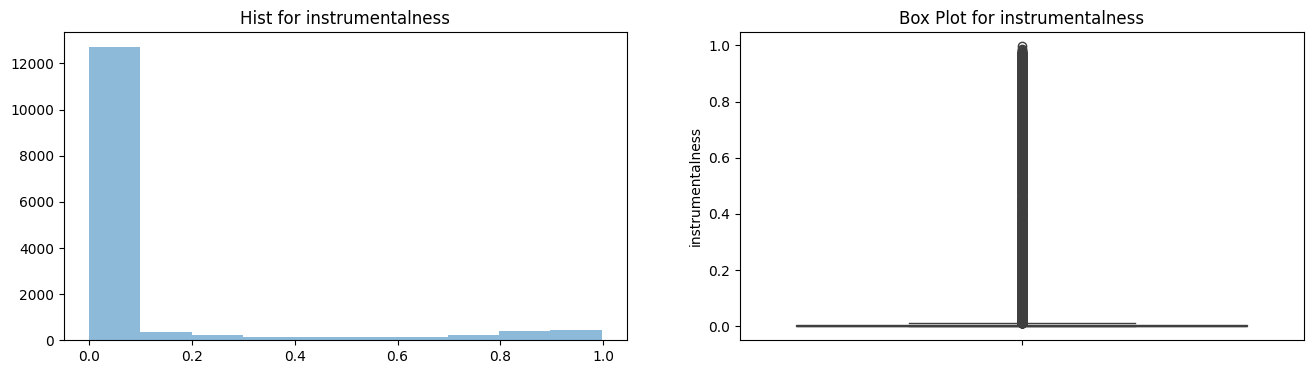

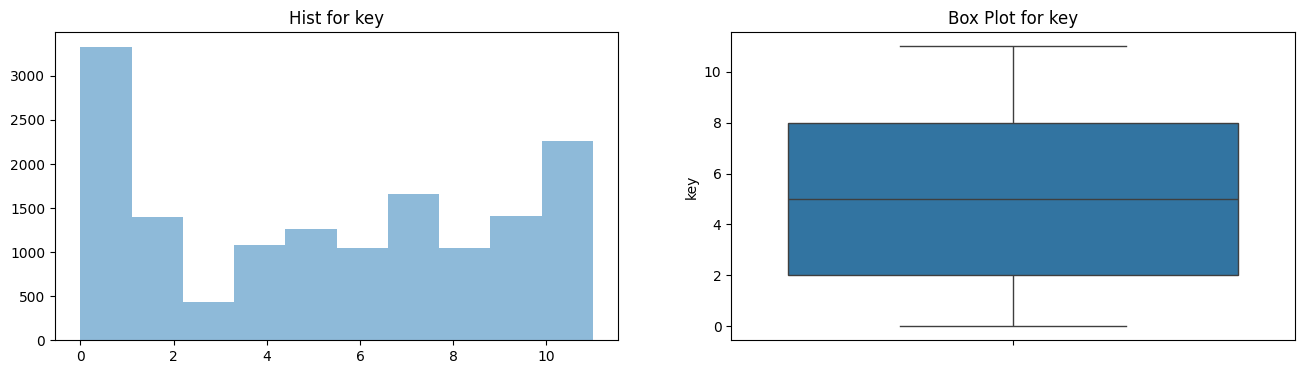

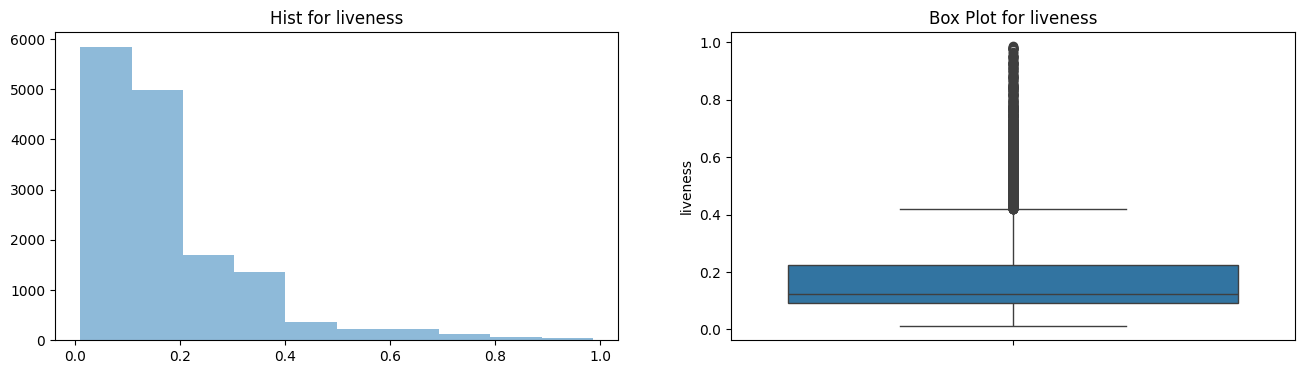

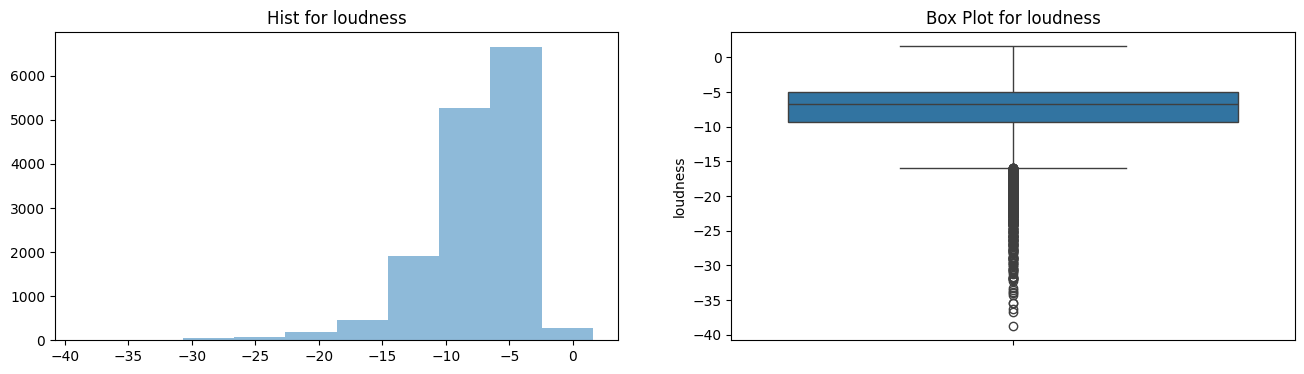

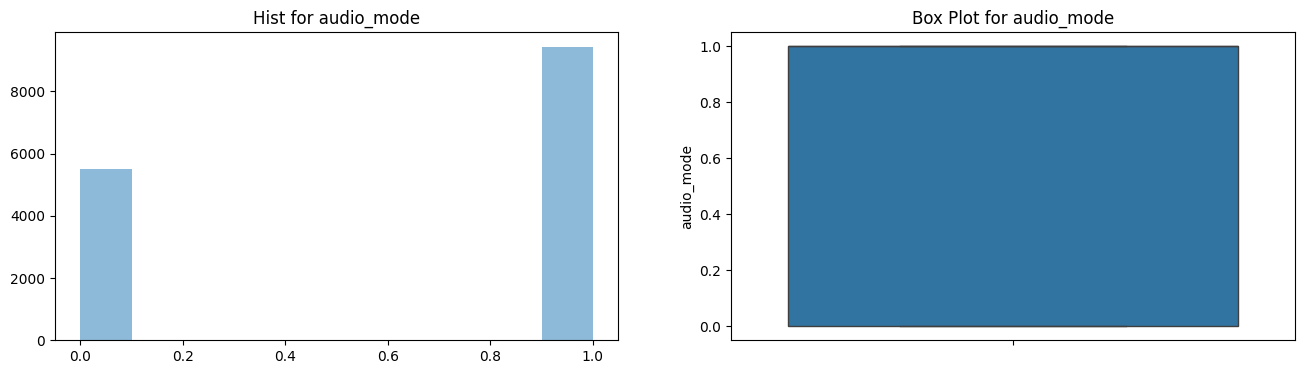

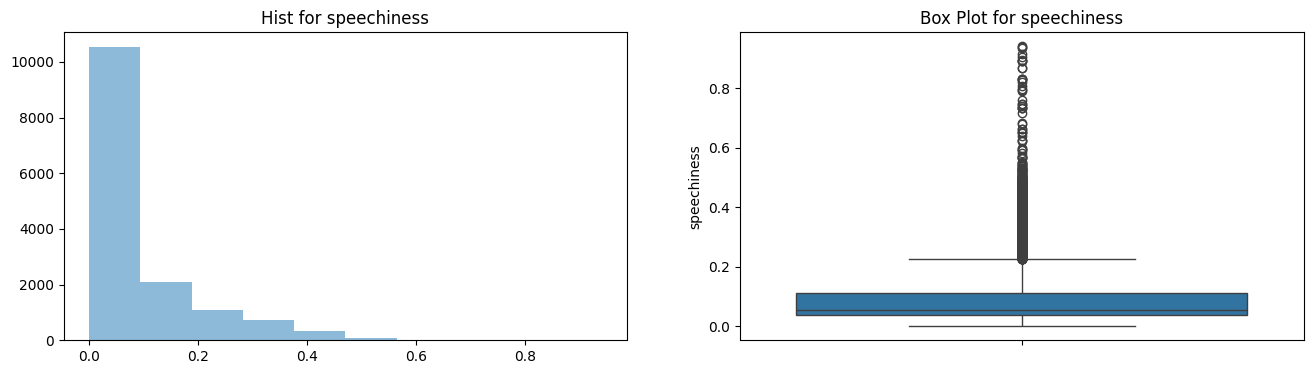

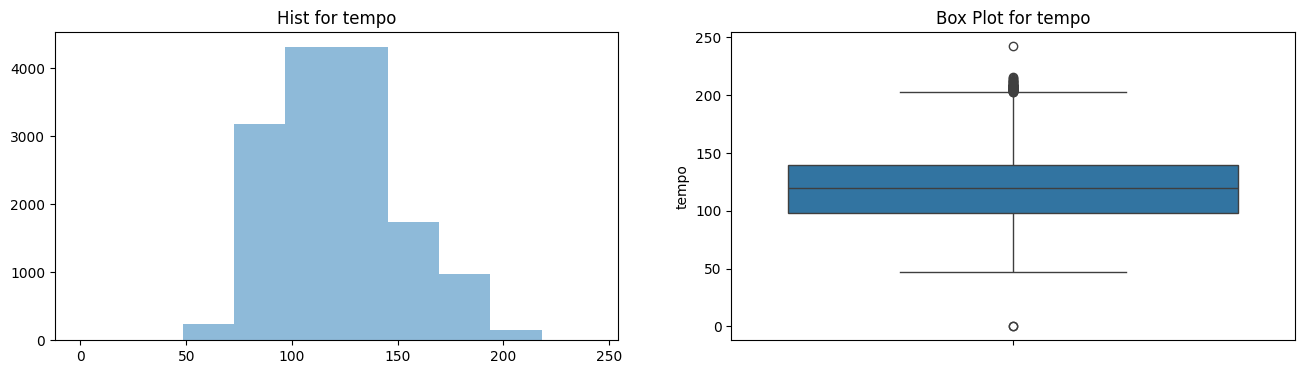

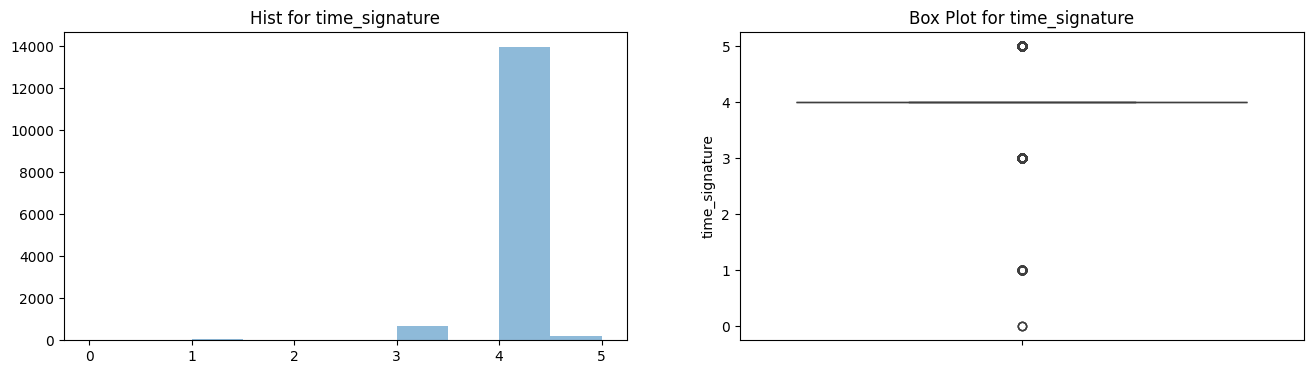

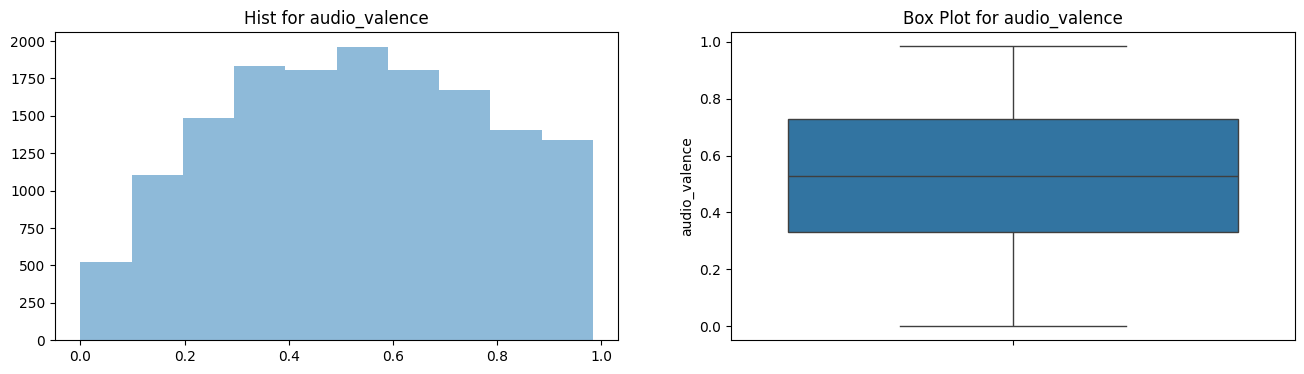

In [4]:
for column in df.select_dtypes(include=['number']):
    plt.figure(figsize=(16, 4))
    plt.subplot(1,2,1)
    plt.title(f'Hist for {column}')
    plt.hist(df[column], alpha=0.5)
    plt.subplot(1,2,2)
    plt.title(f'Box Plot for {column}')
    sns.boxplot(df[column])
    plt.show()

Now we will drop rows with outliers

In [5]:
df.drop(['song_name'], axis=1, inplace=True)
df_befor_outliers = df.copy()

for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # Count outliers in the current column
    outliers_count = ((df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR))).sum()
    
    df = df[~((df[i] < (Q1 - 1.5 * IQR)) | (df[i] > (Q3 + 1.5 * IQR)))]
    df = df.reset_index(drop=True)

print('Before removal of outliers, The dataset had {} samples.'.format(df_befor_outliers.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df.shape[0]))


Before removal of outliers, The dataset had 14926 samples.
After removal of outliers, The dataset now has 8485 samples.


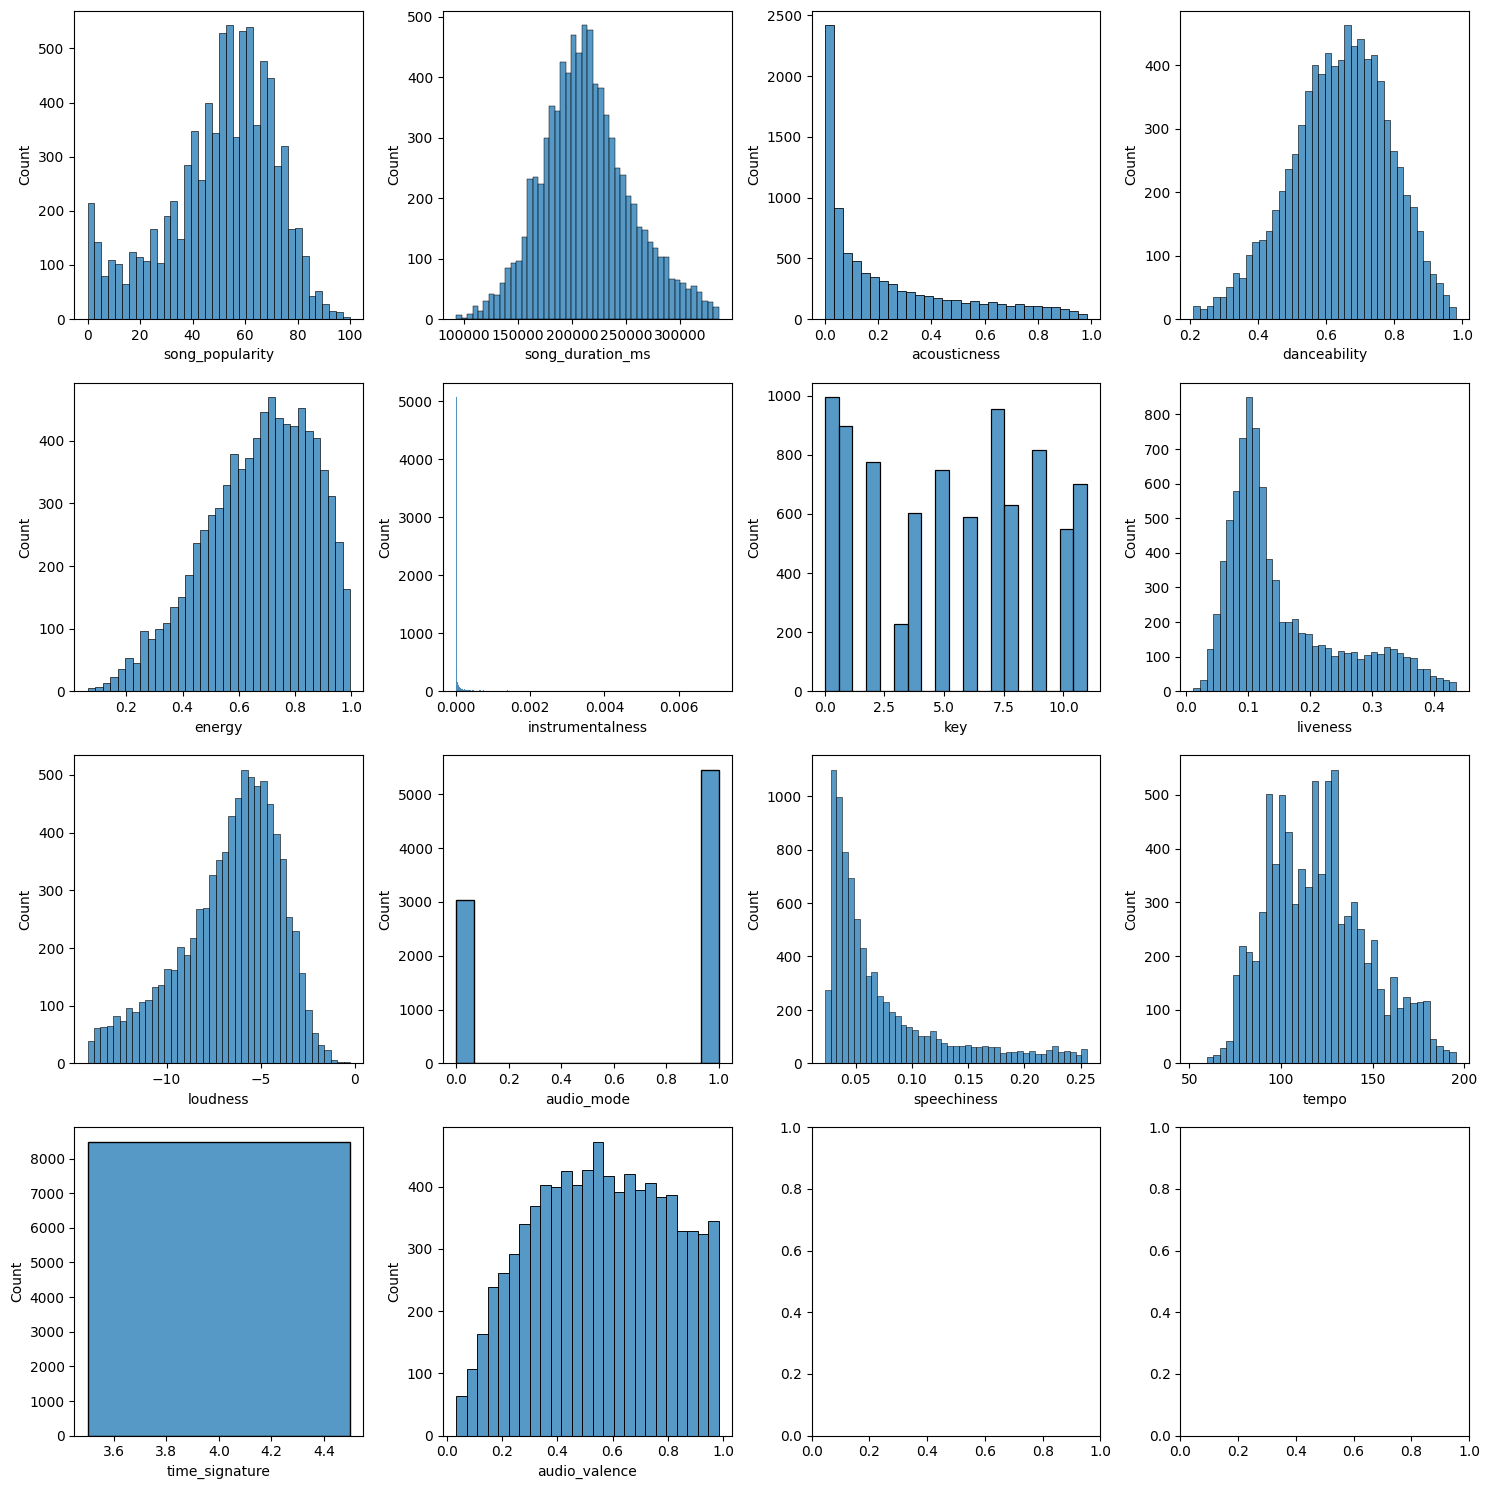

In [6]:
figure, axs = plt.subplots(4, 4)
figure.set_size_inches(15, 15)
cols = df.columns

for i in range(4):
    for j in range(4):
        if (4*i + j) < 14:
            sns.histplot(df[cols[4 * i + j]], ax=axs[i, j])

# To ensure a clean layout without overlapping subplots
for i in range(3):
    for j in range(4):
        if (4*i + j) >= 14:
            axs[i, j].axis('off')

plt.tight_layout()
plt.show()